##***Demo Data Drifting***
MLOps WorkShop

COMIA 2024


---

Dr. Gerardo Rodríguez Hernández

Powered by Chat GPT 4o.

October 2024

In [ ]:
# Install required libraries
%pip install numpy pandas matplotlib seaborn scikit-learn alibi-detect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.5/381.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.mixture import GaussianMixture
from alibi_detect.cd import KSDrift

In [ ]:
# Load the Wine Dataset and Generate Descriptive Statistics
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# Display the first few rows of the dataset
print("First few rows of the Wine dataset:")
display(wine_df.head())

# Generate descriptive statistics
print("Descriptive statistics of the Wine dataset:")
display(wine_df.describe())

First few rows of the Wine dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Descriptive statistics of the Wine dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
# Train a Random Forest Classifier with the wine dataset
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [ ]:
# Test the classifier
y_pred = clf.predict(X_test)

In [ ]:
# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy on original test data: {accuracy:.2f}')
print(f'Recall on original test data: {recall:.2f}')
print(f'F1 Score on original test data: {f1:.2f}')

Accuracy on original test data: 0.93
Recall on original test data: 0.93
F1 Score on original test data: 0.93


In [ ]:
# Generate Synthetic Data for favanoids column using a Gausian Mixture Model with slightly different characteristics.

meanshift = 0.2

gmm = GaussianMixture(n_components = 3, random_state = 0).fit(wine_df['flavanoids'].to_numpy().reshape(-1,1))
# Print the original means of the fitted GMM model
print("Original means:\n", gmm.means_)

# Modify the means of the gausian componnents
modified_means = gmm.means_.copy()
modified_means[0] *= (1 + meanshift)  # Adjusting the mean of the first component
modified_means[1] *= (1 + meanshift)  # Adjusting the mean of the second component
modified_means[2] *= (1 + meanshift)  # Adjusting the mean of the third component

# Assign the modified means back to the GMM
gmm.means_ = modified_means

# Print the modified means
print("Modified means:\n", gmm.means_)

# Generate a copy of the wine dataset
synthetic_data = wine_df.copy()

# Update flavanoids column with generated sampled data with modified distribution
synthetic_data['flavanoids'] = gmm.sample(int(wine_df.describe()['flavanoids']['count']))[0].reshape(-1)
X_synthetic = synthetic_data[wine.feature_names].values
y_synthetic = synthetic_data['target'].values


Original means:
 [[0.62368945]
 [2.81968338]
 [1.51821474]]
Modified means:
 [[0.74842734]
 [3.38362005]
 [1.82185769]]


In [ ]:
# Test the trained model with synthetic data
y_synthetic_pred = clf.predict(X_synthetic)

# Calculate and display metrics
synthetic_accuracy = accuracy_score(y_synthetic, y_synthetic_pred)
synthetic_recall = recall_score(y_synthetic, y_synthetic_pred, average='weighted')
synthetic_f1 = f1_score(y_synthetic, y_synthetic_pred, average='weighted')

print(f'Synthetic Data Accuracy: {synthetic_accuracy:.2f}')
print(f'Synthetic Data Recall: {synthetic_recall:.2f}')
print(f'Synthetic Data F1 Score: {synthetic_f1:.2f}')


Synthetic Data Accuracy: 0.85
Synthetic Data Recall: 0.85
Synthetic Data F1 Score: 0.85


In [ ]:
# Detect Data Drift using Alibi-Detect
# Kolmogorov-Smirnov test
cd = KSDrift(X_train, p_val=0.05)
drift_pred = cd.predict(X_synthetic)
print('SK-Drift detected:', drift_pred['data']['is_drift'])


SK-Drift detected: 1


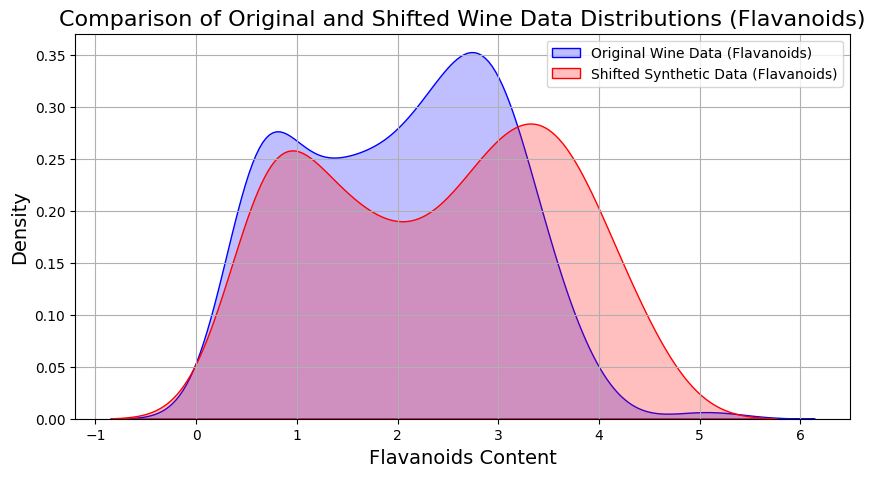

In [ ]:
# Plotting the distributions of the original and synthetic (shifted) data
plt.figure(figsize=(10,5))

# Original data distribution
sns.kdeplot(wine_df['flavanoids'], label='Original Wine Data (Flavanoids)', fill=True, color='blue')

# Synthetic data distribution
sns.kdeplot(synthetic_data['flavanoids'], label='Shifted Synthetic Data (Flavanoids)', fill=True, color='red')

# Adding labels and title
plt.title('Comparison of Original and Shifted Wine Data Distributions (Flavanoids)', fontsize=16)
plt.xlabel('Flavanoids Content', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(True)

# Show plot
plt.show()